In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
cleaned = pd.read_csv("INSERT FILE PATH FOR CLEANED DATA")

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16708\369533762.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  removed = pd.read_csv("C:/Users/nikhi/Desktop/ecommerceUK_fullcleaned.csv")


In [5]:
df = pd.crosstab(cleaned['InvoiceNo'],cleaned['Description'])

## Used for Apriori Algorithm, encodes item frequency by order
def encode(item_freq):
    res = False
    if item_freq > 0:
        res = True
    return res

store_input = df.map(encode)
df.shape

(20138, 4077)

In [16]:
## Apriori Algorithm function to use it by month if we choose to do so
# WARNING THIS ALGORITHM COULD REQUIRE A LOT OF SYSTEM MEMORY, DO NOT LOWER min_support ANY FURTHER IF YOU DON'T WANT ERRORS
def apriori_by_month(month):
    if(month != 'All'):
        m = cleaned.loc[cleaned['Month'] == month]
    else:
        m = cleaned
    m_df = pd.crosstab(m['InvoiceNo'], m['Description'])
    inp = m_df.map(encode)
    f_sets = apriori(inp, min_support = 0.01, use_colnames = True)
    rules = association_rules(f_sets, metric="confidence", min_threshold = 0.5)
    return rules

In [7]:
all_ap=apriori_by_month('All')

In [18]:
# Displays the most popular combinations in order
all_ap.sort_values(['support','confidence','lift'], ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
132,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.060483,0.103883,0.040967,0.677340,6.520206,1.0,0.034684,2.777278,0.901134,0.331992,0.639935,0.535850
90,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050402,0.052935,0.038137,0.756650,14.294018,1.0,0.035469,3.891786,0.979405,0.584920,0.743049,0.738550
89,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.052935,0.050402,0.038137,0.720450,14.294018,1.0,0.035469,3.396883,0.982024,0.584920,0.705612,0.738550
144,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.058794,0.103883,0.035952,0.611486,5.886288,1.0,0.029844,2.306527,0.881968,0.283699,0.566448,0.478783
142,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.058347,0.103883,0.033767,0.578723,5.570904,1.0,0.027706,2.127146,0.871336,0.262853,0.529887,0.451886
160,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.063214,0.077664,0.031830,0.503535,6.483495,1.0,0.026921,1.857806,0.902834,0.291894,0.461731,0.456691
9,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048664,0.052190,0.031781,0.653061,12.513175,1.0,0.029241,2.731923,0.967150,0.460101,0.633958,0.631003
8,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052190,0.048664,0.031781,0.608944,12.513175,1.0,0.029241,2.432735,0.970747,0.460101,0.588940,0.631003
84,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038038,0.050402,0.031433,0.826371,16.395521,1.0,0.029516,5.469112,0.976138,0.551394,0.817155,0.725008
85,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050402,0.038038,0.031433,0.623645,16.395521,1.0,0.029516,2.556000,0.988848,0.551394,0.608764,0.725008


In [8]:
# Limits the display to only show combinations of two products
heat = all_ap[(all_ap['antecedents'].apply(len) == 1) & (all_ap['consequents'].apply(len) == 1)]
heat = heat.sort_values(["support","confidence","lift"],axis = 0, ascending = False).head(20)
heat['antecedents'] = heat['antecedents'].apply(lambda a: ','.join(list(a)))
heat['consequents'] = heat['consequents'].apply(lambda a: ','.join(list(a)))

<Axes: xlabel='antecedents', ylabel='consequents'>

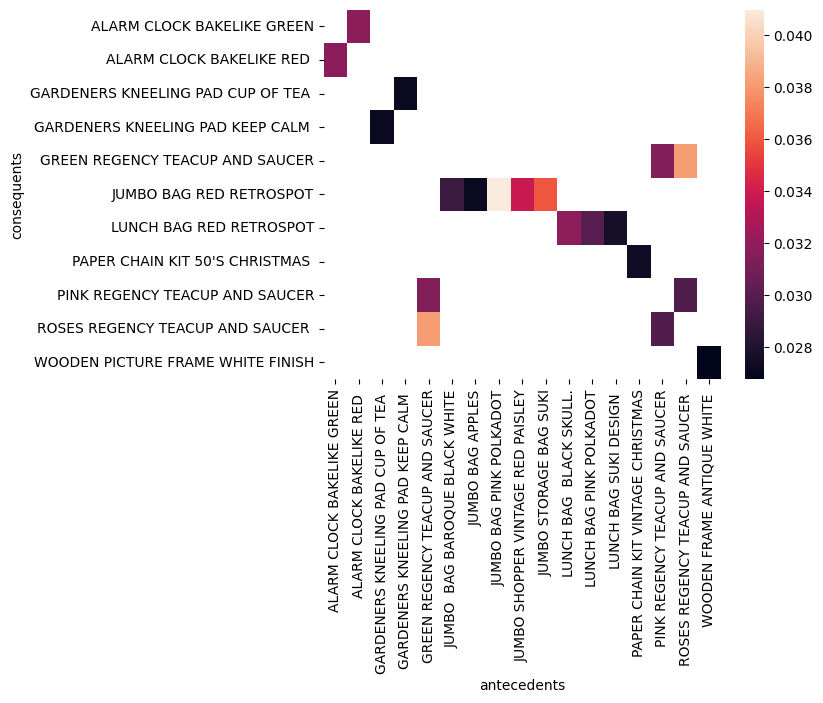

In [9]:
#This heatmap shows support
support_table = heat.pivot(index = 'consequents', columns = 'antecedents', values = 'support')
sns.heatmap(support_table)

In [10]:
# Limits the display to only show combinations of two products
heatLift = all_ap[(all_ap['antecedents'].apply(len) == 1) & (all_ap['consequents'].apply(len) == 1)]
heatLift = heatLift.sort_values(["lift","support","confidence"],axis = 0, ascending = False).head(40)
heatLift['antecedents'] = heatLift['antecedents'].apply(lambda a: ','.join(list(a)))
heatLift['consequents'] = heatLift['consequents'].apply(lambda a: ','.join(list(a)))

<Axes: xlabel='antecedents', ylabel='consequents'>

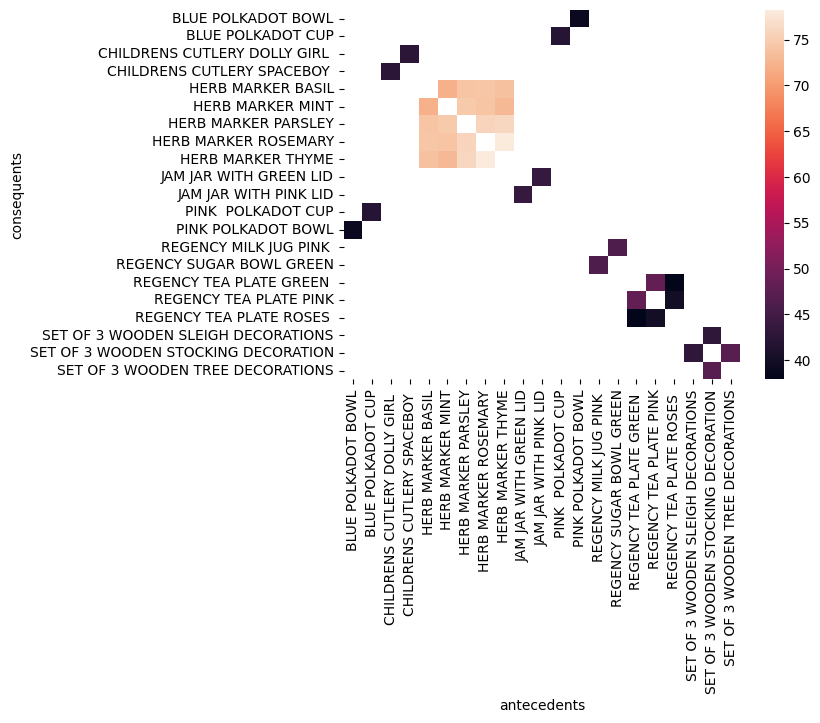

In [11]:
#This heatmap shows support lift
support_table_lift = heatLift.pivot(index = 'consequents', columns = 'antecedents', values = 'lift')
sns.heatmap(support_table_lift)

In [12]:
# Initializing the text frequency function
idf_model = TfidfVectorizer()

In [13]:
# TF_IDF Function that lets us use it by month if we choose to do so
def TF_IDF(month):
    if(month != 'All'):
        m = cleaned.loc[cleaned['Month'] == month]
    else:
        m = cleaned
    idf = idf_model.fit_transform(m.Description)
    common_words_month = idf_model.get_feature_names_out()
    df_month = pd.DataFrame(idf.toarray(), columns = common_words_month)
    df_month.loc['Frequency'] = (df_month > 0).sum()
    result = df_month.loc['Frequency'].to_frame()
    result = result.drop('of')
    result.columns = ['Frequency']
    result = result.reset_index(names= 'Words')
    result['Month'] = month
    result = result.sort_values(by =['Frequency'], ascending = False)
    return result

In [15]:
TF_IDF('All').head(20)

,Words,Frequency,Month
1764,set,62379.0,All
172,bag,51219.0,All
1642,red,42630.0,All
983,heart,38793.0,All
1660,retrospot,34419.0,All
2126,vintage,33275.0,All
633,design,29572.0,All
1517,pink,29468.0,All
471,christmas,24844.0,All
299,box,23954.0,All
